In [206]:
import os, glob
import librosa
import soundfile
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [177]:
#emotions in the dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [178]:
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

# Extract Feature

In [208]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            #pitches = np.mean(librosa.piptrack(y=X, sr=sample_rate), axis=0)
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

# Load Data

In [209]:
def load_data(test_size=0.2):
    x,y = [],[]
    for audio_file in glob.glob("/Users/priyamchadha/Downloads/ravdess-emotional-speech-audio/Actor_*//*.wav"):
        file_name = os.path.basename(audio_file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(audio_file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [210]:
#Split the dataset
x_train,x_test,y_train,y_test = load_data(test_size=0.25)

In [211]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [212]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=1500)

In [213]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=1500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [214]:
#Predict for the test set
y_pred=model.predict(x_test)

In [215]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.98%


In [216]:
print(x_train, y_train)
print(len(x_test))

[[-5.17395752e+02  6.44246597e+01 -9.35843086e+00 ...  1.68579538e-06
   1.68967446e-07  1.04017674e-08]
 [-6.35916809e+02  7.43315582e+01 -5.85303926e+00 ...  6.22302707e-08
   1.02492583e-08  5.82718362e-09]
 [-4.56837219e+02  3.59155922e+01 -2.00359707e+01 ...  8.74613306e-06
   7.03458113e-07  1.06814966e-08]
 ...
 [-7.87431030e+02  5.81067390e+01  4.63948345e+00 ...  9.25039956e-08
   1.13621246e-08  5.76906078e-09]
 [-5.69864624e+02  6.76496811e+01 -1.04909821e+01 ...  7.58699457e-07
   6.69550673e-08  7.57173702e-09]
 [-6.32520874e+02  8.52612839e+01  5.53255320e-01 ...  7.66814367e-07
   7.64415446e-08  8.00693822e-09]] ['happy', 'disgust', 'fearful', 'disgust', 'fearful', 'calm', 'disgust', 'calm', 'calm', 'calm', 'fearful', 'disgust', 'fearful', 'happy', 'fearful', 'disgust', 'disgust', 'disgust', 'calm', 'disgust', 'calm', 'disgust', 'disgust', 'fearful', 'calm', 'calm', 'disgust', 'calm', 'fearful', 'disgust', 'disgust', 'calm', 'disgust', 'disgust', 'calm', 'calm', 'disgus

In [217]:
print(x_test, y_test)

[[-7.14013794e+02  8.90848770e+01  9.13674068e+00 ...  1.02308544e-08
   8.33870573e-09  8.37755376e-09]
 [-7.06491882e+02  9.51069412e+01  4.76243067e+00 ...  1.38271243e-08
   6.99324465e-09  6.59510224e-09]
 [-5.61696533e+02  6.60618591e+01 -7.62581050e-01 ...  1.87463024e-06
   1.51809260e-07  7.96570720e-09]
 ...
 [-7.99461670e+02  4.54785194e+01  8.53894591e-01 ...  1.01085194e-08
   6.35579367e-09  6.13411766e-09]
 [-6.74099365e+02  6.27953796e+01  3.56067467e+00 ...  9.50044168e-08
   1.06947704e-08  6.73168410e-09]
 [-4.32545685e+02  4.16320267e+01 -2.87467003e+01 ...  2.22319413e-05
   1.70531200e-06  1.56272399e-08]] ['calm', 'happy', 'disgust', 'happy', 'fearful', 'happy', 'happy', 'disgust', 'happy', 'disgust', 'calm', 'disgust', 'fearful', 'disgust', 'fearful', 'calm', 'happy', 'happy', 'disgust', 'fearful', 'disgust', 'disgust', 'fearful', 'calm', 'fearful', 'fearful', 'calm', 'calm', 'happy', 'disgust', 'disgust', 'calm', 'fearful', 'happy', 'disgust', 'happy', 'calm', 

In [218]:
combine = list(zip(y_test, x_test))

dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in range(len(combine)):
    if combine[i][0] == 'happy':
        dict1['happy'] = combine[i][1]
    elif combine[i][0] == 'disgust':
        dict1['disgust'] = combine[i][1]
    elif combine[i][0] == 'fearful':
        dict1['fearful'] = combine[i][1]
    elif combine[i][0] == 'calm':
        dict1['calm'] = combine[i][1]

In [219]:
#print(dict1)

for i in dict1.keys():
    #print(i)
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i] +=combine[j][1]
print(dict1)
for _,v in dict1.items():
    print(len(v))

{'happy': array([-3.93607435e+04,  4.44631916e+03, -8.13953932e+02,  3.11292225e+02,
       -3.21136914e+01,  4.67065711e+02, -7.06993400e+02, -1.10503330e+02,
       -4.82910561e+02, -5.32121499e+02, -2.93379218e+02, -1.37003531e+02,
       -2.61752800e+02, -2.22528575e+02, -2.72999910e+02, -7.72570930e+01,
       -1.40633046e+02, -3.51439714e+01, -1.31089994e+02, -1.40172904e+02,
       -8.70965344e+01, -1.17550309e+02, -9.79207668e+01, -7.21875144e+01,
       -1.35948103e+02, -5.90888279e+01, -1.55450170e+02, -4.67469510e+01,
       -2.81833378e+01,  2.68489595e+01,  2.49430832e+00,  9.24755329e+01,
        3.57772468e+01,  8.80612896e+01,  1.06965011e+02,  7.94426096e+01,
        7.29536557e+01,  6.57945607e+01,  6.22363785e+01,  8.90563684e+01,
        4.32903770e+01,  4.23626058e+01,  4.18019235e+01,  4.21148562e+01,
        4.34535368e+01,  4.39706570e+01,  4.44944544e+01,  4.44416416e+01,
        4.44496824e+01,  4.40996882e+01,  4.43481077e+01,  4.44436032e+01,
        6.59542

In [220]:

df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)

            happy       disgust       fearful          calm
0   -3.936074e+04 -5.520607e+04 -4.430921e+04 -6.788523e+04
1    4.446319e+03  6.241504e+03  4.589132e+03  7.382832e+03
2   -8.139539e+02 -1.539723e+02 -1.249018e+03  5.356118e+02
3    3.112922e+02  1.112407e+03  3.872026e+02  1.819663e+03
4   -3.211369e+01  9.017529e+01 -4.130554e+02  3.359527e+02
..            ...           ...           ...           ...
175  4.234731e-04  3.679415e-04  1.973213e-03  2.620529e-05
176  3.342484e-04  2.768292e-04  1.476734e-03  1.560001e-05
177  1.601681e-04  1.309224e-04  6.787744e-04  6.431905e-06
178  1.487988e-05  1.245615e-05  6.334286e-05  1.109800e-06
179  5.472542e-07  7.444847e-07  8.689106e-07  7.030151e-07

[180 rows x 4 columns]


            happy   disgust   fearful      calm
happy    1.000000  0.999626  0.999719  0.999114
disgust  0.999626  1.000000  0.999212  0.999852
fearful  0.999719  0.999212  1.000000  0.998597
calm     0.999114  0.999852  0.998597  1.000000


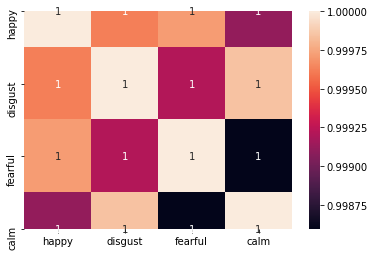

In [221]:
print(df.corr())



corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)


In [222]:
print(x_test.shape)
print(len(y_test))

(168, 180)
168


In [223]:
print(len(x_test[0]))

180


In [224]:
for i in range(len(x_test)):
    print(len(x_test[i]))

180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180


In [225]:
#np addition

net = list(zip(x_test, y_test))
print(net)



for j in range(len(combine)):
    if i==combine[j][0]:
        dict1[i].append(j)
#print(dict1)

[(array([-7.14013794e+02,  8.90848770e+01,  9.13674068e+00,  3.36296082e+01,
        7.69343662e+00,  2.24652405e+01,  4.80596924e+00,  8.52479076e+00,
        1.94284827e-01,  8.77160490e-01, -3.57308030e-01,  9.40445125e-01,
        2.77667713e+00, -3.45724964e+00, -3.55116338e-01,  3.09245753e+00,
       -1.27683949e+00,  1.64742148e+00,  6.04806566e+00,  7.16399908e-01,
       -8.34981740e-01, -8.58335346e-02,  2.97867012e+00,  1.82885873e+00,
       -2.63613176e+00,  1.27821755e+00,  8.94821227e-01, -3.35747623e+00,
       -2.38091016e+00,  3.09413602e-03,  5.95760703e-01, -2.70966709e-01,
        3.09532434e-01,  1.60739291e+00, -2.60935366e-01, -2.42374450e-01,
       -6.27052069e-01, -4.86460716e-01, -1.42935061e+00, -9.80792120e-02,
        7.27157652e-01,  7.11093307e-01,  6.81504071e-01,  6.66130781e-01,
        6.81135893e-01,  6.91898286e-01,  6.89164162e-01,  7.30226696e-01,
        7.63279557e-01,  7.59921849e-01,  7.53418505e-01,  7.45941401e-01,
        3.34151497e-04,

In [226]:
average_array = [] 
for i in range(len(x_test)):
    k=0
    for j in range(len(x_test[i])):
        k += (x_test[i][j]/len(x_test))
    average_array.append(k)
print(average_array)

[-3.108199352067736, -3.3945244309708973, -3.032266673530347, -3.3041333044082046, -3.886977005223506, -2.244997215846795, -2.1635229243492264, -3.642019351468426, -3.8539391195975408, -3.251504847460008, -3.1169566228331456, -3.119162810285187, -3.207969133497406, -3.5446501806300605, -1.8422772365368638, -3.846366345459445, -2.999304278331426, -4.129460195195479, -2.6661549326270495, -2.5117130617365517, -3.537971764541315, -2.7204888466422505, -3.485300055606853, -3.124397124293286, -3.1743589045117657, -1.431092862642911, -3.394887887009606, -4.524189027159717, -3.7678864560797645, -3.813011195075618, -3.370603628722846, -4.554116878229183, -3.255734264014539, -2.6069623552872527, -3.3616039582917394, -2.8251968384312973, -3.2384046783799354, -3.5674192475936173, -3.1231565951829747, -3.6105681760486306, -2.762857119018699, -3.374497400302414, -3.302676258547507, -3.5393237867531977, -2.6574823828842096, -3.6725682258671357, -3.067922409354485, -3.7879750963974548, -2.6813584206597

In [227]:
for keys, values in emotions.items():
    print(keys,values)

01 neutral
02 calm
03 happy
04 sad
05 angry
06 fearful
07 disgust
08 surprised


In [228]:
for i in observed_emotions:
    for key, values in emotions.items():
        if i == values:
            print(key)

02
03
06
07


In [229]:
#print(list(zip(x_test,y_test)))
print(y_test)
print(set(y_test))

['calm', 'happy', 'disgust', 'happy', 'fearful', 'happy', 'happy', 'disgust', 'happy', 'disgust', 'calm', 'disgust', 'fearful', 'disgust', 'fearful', 'calm', 'happy', 'happy', 'disgust', 'fearful', 'disgust', 'disgust', 'fearful', 'calm', 'fearful', 'fearful', 'calm', 'calm', 'happy', 'disgust', 'disgust', 'calm', 'fearful', 'happy', 'disgust', 'happy', 'calm', 'calm', 'fearful', 'fearful', 'fearful', 'disgust', 'fearful', 'calm', 'fearful', 'disgust', 'calm', 'disgust', 'fearful', 'disgust', 'happy', 'fearful', 'calm', 'calm', 'calm', 'disgust', 'fearful', 'calm', 'calm', 'happy', 'calm', 'fearful', 'happy', 'happy', 'happy', 'fearful', 'disgust', 'calm', 'fearful', 'calm', 'calm', 'happy', 'fearful', 'disgust', 'disgust', 'calm', 'disgust', 'happy', 'calm', 'fearful', 'calm', 'disgust', 'calm', 'happy', 'disgust', 'calm', 'happy', 'calm', 'fearful', 'happy', 'happy', 'fearful', 'disgust', 'fearful', 'fearful', 'calm', 'happy', 'disgust', 'calm', 'happy', 'fearful', 'happy', 'disgust'

In [230]:
test_emotion_keys = []
for i in y_test:
    for key, value in emotions.items():
        if i == value:
            test_emotion_keys.append(key)
print(test_emotion_keys)
print(len(x_test))
print(len(average_array))
print(len(test_emotion_keys))

'''combine = list(zip(y_test, average_array))

#print(combine)
dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in dict1.keys():
    #print(i)
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i].append(j)
#print(dict1)
for _,v in dict1.items():
    print(len(v))
'''

['02', '03', '07', '03', '06', '03', '03', '07', '03', '07', '02', '07', '06', '07', '06', '02', '03', '03', '07', '06', '07', '07', '06', '02', '06', '06', '02', '02', '03', '07', '07', '02', '06', '03', '07', '03', '02', '02', '06', '06', '06', '07', '06', '02', '06', '07', '02', '07', '06', '07', '03', '06', '02', '02', '02', '07', '06', '02', '02', '03', '02', '06', '03', '03', '03', '06', '07', '02', '06', '02', '02', '03', '06', '07', '07', '02', '07', '03', '02', '06', '02', '07', '02', '03', '07', '02', '03', '02', '06', '03', '03', '06', '07', '06', '06', '02', '03', '07', '02', '03', '06', '03', '07', '07', '02', '02', '03', '02', '07', '07', '02', '02', '03', '06', '02', '03', '07', '02', '06', '07', '06', '02', '07', '07', '07', '07', '02', '03', '06', '02', '06', '07', '03', '03', '07', '02', '06', '07', '06', '02', '07', '07', '06', '07', '06', '06', '07', '03', '03', '06', '03', '02', '07', '06', '07', '06', '02', '02', '03', '02', '02', '07', '06', '06', '02', '02', '02

"combine = list(zip(y_test, average_array))\n\n#print(combine)\ndict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }\n\nfor i in dict1.keys():\n    #print(i)\n    for j in range(len(combine)):\n        if i==combine[j][0]:\n            dict1[i].append(j)\n#print(dict1)\nfor _,v in dict1.items():\n    print(len(v))\n"

In [231]:
df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)

            happy       disgust       fearful          calm
0   -3.936074e+04 -5.520607e+04 -4.430921e+04 -6.788523e+04
1    4.446319e+03  6.241504e+03  4.589132e+03  7.382832e+03
2   -8.139539e+02 -1.539723e+02 -1.249018e+03  5.356118e+02
3    3.112922e+02  1.112407e+03  3.872026e+02  1.819663e+03
4   -3.211369e+01  9.017529e+01 -4.130554e+02  3.359527e+02
..            ...           ...           ...           ...
175  4.234731e-04  3.679415e-04  1.973213e-03  2.620529e-05
176  3.342484e-04  2.768292e-04  1.476734e-03  1.560001e-05
177  1.601681e-04  1.309224e-04  6.787744e-04  6.431905e-06
178  1.487988e-05  1.245615e-05  6.334286e-05  1.109800e-06
179  5.472542e-07  7.444847e-07  8.689106e-07  7.030151e-07

[180 rows x 4 columns]


In [232]:
print(len(average_array),len(test_emotion_keys))

168 168


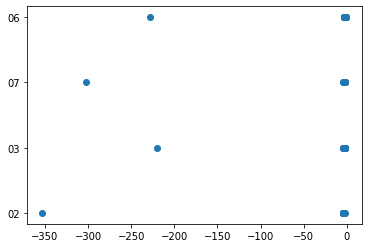

In [233]:
plt.scatter(average_array, test_emotion_keys)
plt.show()


{'A': [-3.108199352067736, -3.3945244309708973, -3.032266673530347, -3.3041333044082046, -3.886977005223506, -2.244997215846795, -2.1635229243492264, -3.642019351468426, -3.8539391195975408, -3.251504847460008, -3.1169566228331456, -3.119162810285187, -3.207969133497406, -3.5446501806300605, -1.8422772365368638, -3.846366345459445, -2.999304278331426, -4.129460195195479, -2.6661549326270495, -2.5117130617365517, -3.537971764541315, -2.7204888466422505, -3.485300055606853, -3.124397124293286, -3.1743589045117657, -1.431092862642911, -3.394887887009606, -4.524189027159717, -3.7678864560797645, -3.813011195075618, -3.370603628722846, -4.554116878229183, -3.255734264014539, -2.6069623552872527, -3.3616039582917394, -2.8251968384312973, -3.2384046783799354, -3.5674192475936173, -3.1231565951829747, -3.6105681760486306, -2.762857119018699, -3.374497400302414, -3.302676258547507, -3.5393237867531977, -2.6574823828842096, -3.6725682258671357, -3.067922409354485, -3.7879750963974548, -2.6813584

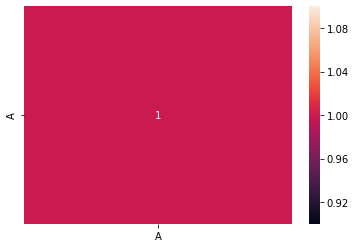

In [234]:
Data={'A': average_array, 'B':test_emotion_keys}

print(Data)
df = pd.DataFrame(Data, columns=['A','B'])
print(df)
df.corr()
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)